# Monty Hall Problem
This project will simulate the [Monty Hall problem ](https://en.wikipedia.org/wiki/Monty_Hall_problem).

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?
>
> -- <cite>https://en.wikipedia.org/wiki/Monty_Hall_problem</cite>

A simple solution using conditional probability shows that the player has a 2/3 chance of winning if they switch.

In this case study, we will prove this to be true in the long run through random experiments and then comparing the outcome of switching or not switching doors.

Project idea from [Super Data Science workshop](https://www.superdatascience.com/workshops/workshop-037-python-monty-hall-probabilities-trial?utm_source=ontraport&utm_medium=email&utm_campaign=workshop_promo_2)

# Import Libraries

In [61]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

# Game Functions

## Creates New Game

In [2]:
def newGame():
    # Randomly assigns one of the doors to have the prize and the remaining
    # doors to have goats. Returns a dict with door number as the key and
    # whatever's behind it as the value.

    # randomly select integer between 1 and 3
    prize_door = random.randint(1, 3)

    # dictionary to hold door values
    doors = dict()

    # loop through 1-3
    for x in range(1, 4):
        # if x is the prize door, set value to prize
        if x == prize_door:
            doors[f'door{x}'] = 'prize'
        # else set value to goat
        else:
            doors[f'door{x}'] = 'goat'

    return doors

## Guest Chooses a Door

In [3]:
def guestChoice():
    # Randomly chooses one door, like the contestant on the game show. Returns
    # the chosen door

    # randomly select integer between 1 and 3
    door_number = random.randint(1, 3)
    door_chosen = f'door{door_number}'

    return door_chosen

## Host Opens a Door

The host opens one of the doors - but not the door with the prize nor the door that was chosen by the contestant.

In [4]:
def openOneDoor(game, chosen_door):
    # Receives as input the created game and door chosen by the contestant and
    # randomly 'opens' one of the doors - but not the door with the prize nor the
    # door that was chosen by the contestant. Returns a modified dict with the
    # value of the open door as 'open'
    
    # list of all doors
    all_doors = list(game.keys())

    # Remove chosen door and prize door from list of doors
    choice_doors = [x for x in all_doors if x != chosen_door and
        game[x] != 'prize']

    # Randomly select a door from choice_doors
    opened_door = random.choice(choice_doors)

    # Update dict with 'open' for chosen door
    game[opened_door] = 'open'

    return game

## Guest Switches Doors
The guest switches their choice from their current choice to the remaining unopened door.

In [5]:
def guestChange(game, chosen_door):
    # Receives as input the created game and door chosen by the contestant and
    # switches the chosen door from the current door to the other closed door

    # list of doors
    doors = list(game.keys())

    # select new door that is not open and not already chosen
    new_door = [x for x in doors if game[x] != 'open'
        and x != chosen_door][0]

    return new_door

## Checks Result

In [6]:
def checkResult(game, chosen_door):
    # Receives as input a created game and a door and returns 'win' if the
    # chosen door contains the prize. Otherwise, returns 'loss'.

    if game[chosen_door] == 'prize':
        return 'win'
    else:
        return 'loss'

# Play a Single Game and Get Result

In [7]:
def play_game():
    # Simulates game play and returns result of game

    # Creates a new game
    game = newGame()

    # Simulates a guest choice
    choice = guestChoice()

    # Opens one door
    opened = openOneDoor(game, choice)

    # Changes the door to the other unopened door
    changed = guestChange(opened, choice)

    # checks the result for the changed choice
    result = checkResult(opened, changed)

    return result

# Long Run Simulation
We will run a simulation of n games and track the percentage of winning for both switching and keeping the door. Since there are only 3 doors, and the opened door is not chosen nor a prize, we can conclude that if the result is 'loss' then the contestant would have won by not switching and vice versa.

In [8]:
def simulation(num_games=100):
    # Simulates num_games games and returns results of winning for switching
    # and not switching
    
    # Default dictionary for storing wins of switching and not switching
    results = defaultdict(int)
    
    # Loops through number of games
    for x in range(num_games):
        
        # Plays a game and gets the result
        result = play_game()
        
        # Updates dictionary with number of wins for switching vs not 
        # switching (result='loss')
        if result == "win":
            results['switch_wins'] += 1
        else:
            results['not_switch_wins'] += 1
    
    return results
    

In [62]:
def print_results(results):
    # Receives results as input and prints results and graph
    
    # Gets the total number of games
    total_games = sum(list(results.values()))
    
    switch_wins = results['switch_wins']
    switch_percent = switch_wins / total_games
    
    not_switch_wins = results['not_switch_wins']
    not_switch_percent = not_switch_wins / total_games
    
    
    print(f"{'Switching Wins:':>20}{switch_percent:>10} ({switch_wins})")
    print(f"{'Not Switching Wins:':>20}{not_switch_percent:>10} ({not_switch_wins})")
    print(f"{'Total Games:':>20}{total_games:>17}")
    
    fig = plt.figure()
    labels = ['Switching', 'Not Switching']
    vals = [switch_wins, not_switch_wins]
    ax = fig.add_axes([0,0,1,1])
    ax.bar(labels, vals)
    plt.show()

## Single Simulation

Here we'll do a single simulation and see the results.

     Switching Wins:    0.6646 (6646)
 Not Switching Wins:    0.3354 (3354)
        Total Games:            10000


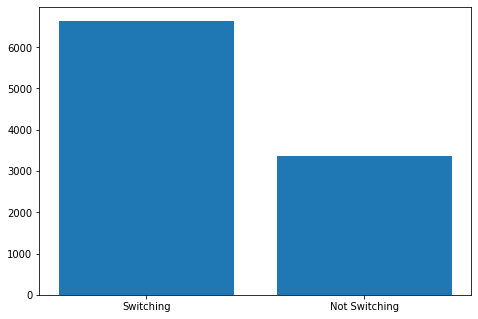

In [64]:
#num_games = int(input("Enter the number of games for this simulation: "))
results = simulation(num_games=10000)
print_results(results)

Like the conditional probability solution states, here you aslo have a 2/3 (66%) likelihood of winning if you switch doors.

## Multiple Simulations

Now, let's do multiple simulations, each with a different number of games and see how the winning percentage for switching changes as the number of games increases.

In [65]:
def multiple_sims(n_games_vals):
    # Multiple simulations to see how results change as n gets larger
    
    sims_percents = dict()
    
    for n in n_games_vals:
        results = simulation(n)
        percent_wins = results['switch_wins'] / n
        sims_percents[n] = percent_wins
        
    return sims_percents

In [85]:
def print_multiple_results(multiple_results):
    fig = plt.figure()
    labels = list(multiple_results.keys())
    vals = list(multiple_results.values())
    plt.plot(labels, vals)
    plt.show()

In [90]:
n_games_vals = [10, 100, 1000, 10000, 100000, 1000000]
multiple_results = multiple_sims(n_games_vals)

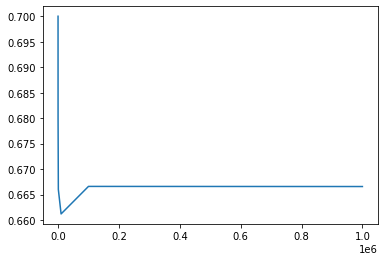

In [92]:
print_multiple_results(multiple_results)

Wee see that the percentage for switching plateaus pretty quickly at around 0.667 which agrees with the conditional probability solution.

You should switch doors!